In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report   
from sklearn.preprocessing import StandardScaler
import joblib 


In [41]:
df = pd.read_csv('loan_data.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [42]:
df.shape

(381, 13)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [44]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(method='ffill',inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

C:\Users\aravi\AppData\Local\Temp\ipykernel_3736\3049690235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\aravi\AppData\Local\Temp\ipykernel_3736\3049690235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,341.417323,0.850394
std,1419.813818,2340.818114,28.358464,67.625957,0.357154
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [48]:
df = df.drop(['Loan_ID'],axis=1)

In [49]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [50]:
df['Dependents'].replace({'3+':4},inplace=True)

C:\Users\aravi\AppData\Local\Temp\ipykernel_3736\742927374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace({'3+':4},inplace=True)


In [53]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: [1 0 2 4]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
ApplicantIncome: [4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 3596 3510 4887 2600
 7660 3365 2799 4226 1442 3750 3167 4692 3500 1828 3667 3748 3600 1800
 2400 3941 4695 3410 5649 5821 2645 4000 1928 3086 4230 4616 2708 2132
 3366 3357 3029 4166 7100 4300 1875 4755 1000 3333 3846 3988 2366 2958
 3273 4133 3620 2484 1977 4188 1759 4288 3052 7333 2071 5316 2929 5050
 2214 2137 2957 3692 2014 2718 3459 4895 3316 4200 2698 2330 1538 4860
 6277 2281 3254 2980 1863 3089 9323 2439 2237 1820 3522 4344 3497 2045
 1916 4600 3625 2178 2383 4885 3858 4191 1907 3416 3917 4408 3244 3975
 2479 3418 3430 5703 3173 3850  150 3727 5000 4283 2221 4009 2971 6250
 4735 2491 3716 3189 3155 3463 3812 3315 5819 2510 3406 6050 9703 6608
 2882 1809 3427 6045 5250 4931 2060 7200 5166 4708 2876 3237 2833 2620
 3900 2750 3103 4100 3927 2301 1811 3158 3704 4124 3075 4400 3153

In [ ]:
df['Dependents'] = df['Dependents'].astype(int)


In [56]:
encoding_cols = {
    'Gender' : {'Male':1,'Female':0},
    'Married' : {'Yes':1,'No':0},
    'Education' : {'Graduate':1,'Not Graduate':0},
    'Self_Employed' : {'Yes':1,'No':0},
    'Property_Area' : {'Urban':1,'Semiurban':2,'Rural':0}, 
    'Loan_Status' : {'Y':1,'N':0}
}

In [57]:
df.replace(encoding_cols,inplace=True)

C:\Users\aravi\AppData\Local\Temp\ipykernel_3736\4033380260.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding_cols,inplace=True)


In [59]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
5,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1
6,1,1,2,1,0,2500,1840.0,109.0,360.0,1.0,1,1
7,1,0,0,1,0,1853,2840.0,114.0,360.0,1.0,0,0
8,1,1,2,1,0,1299,1086.0,17.0,120.0,1.0,1,1
9,1,0,0,1,0,4950,0.0,125.0,360.0,1.0,1,1


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

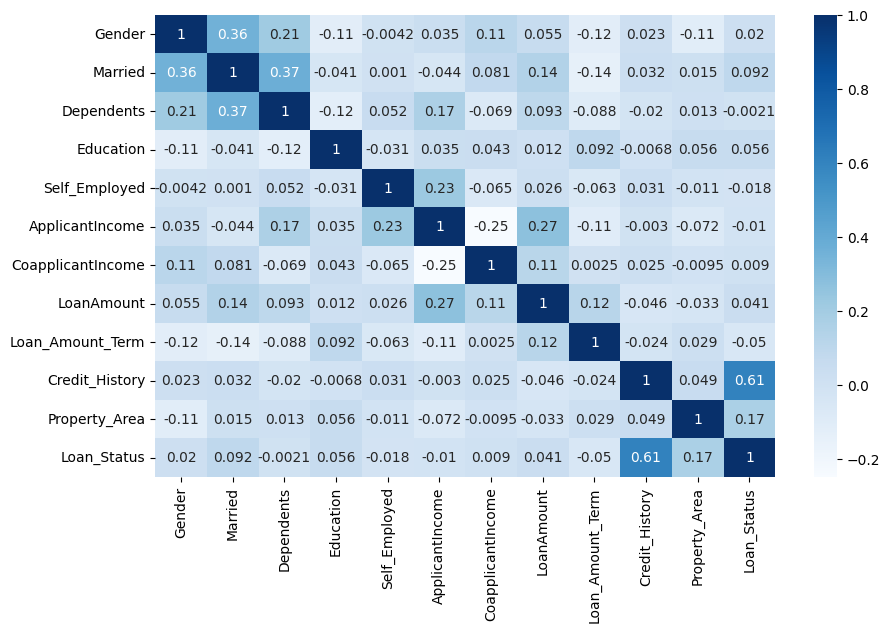

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Text(0.5, 1.0, 'Applicant Income Distribution')

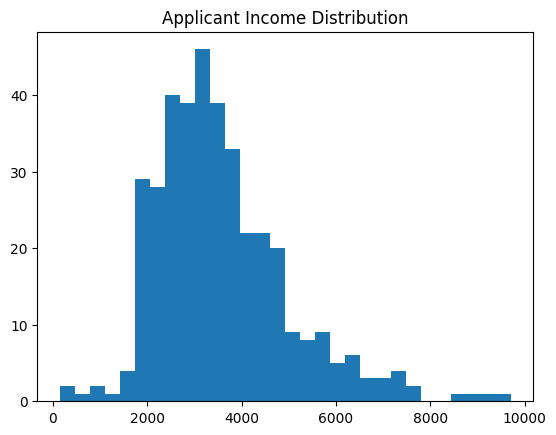

In [62]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.hist(df['ApplicantIncome'],bins=30)
plt.title('Applicant Income Distribution')

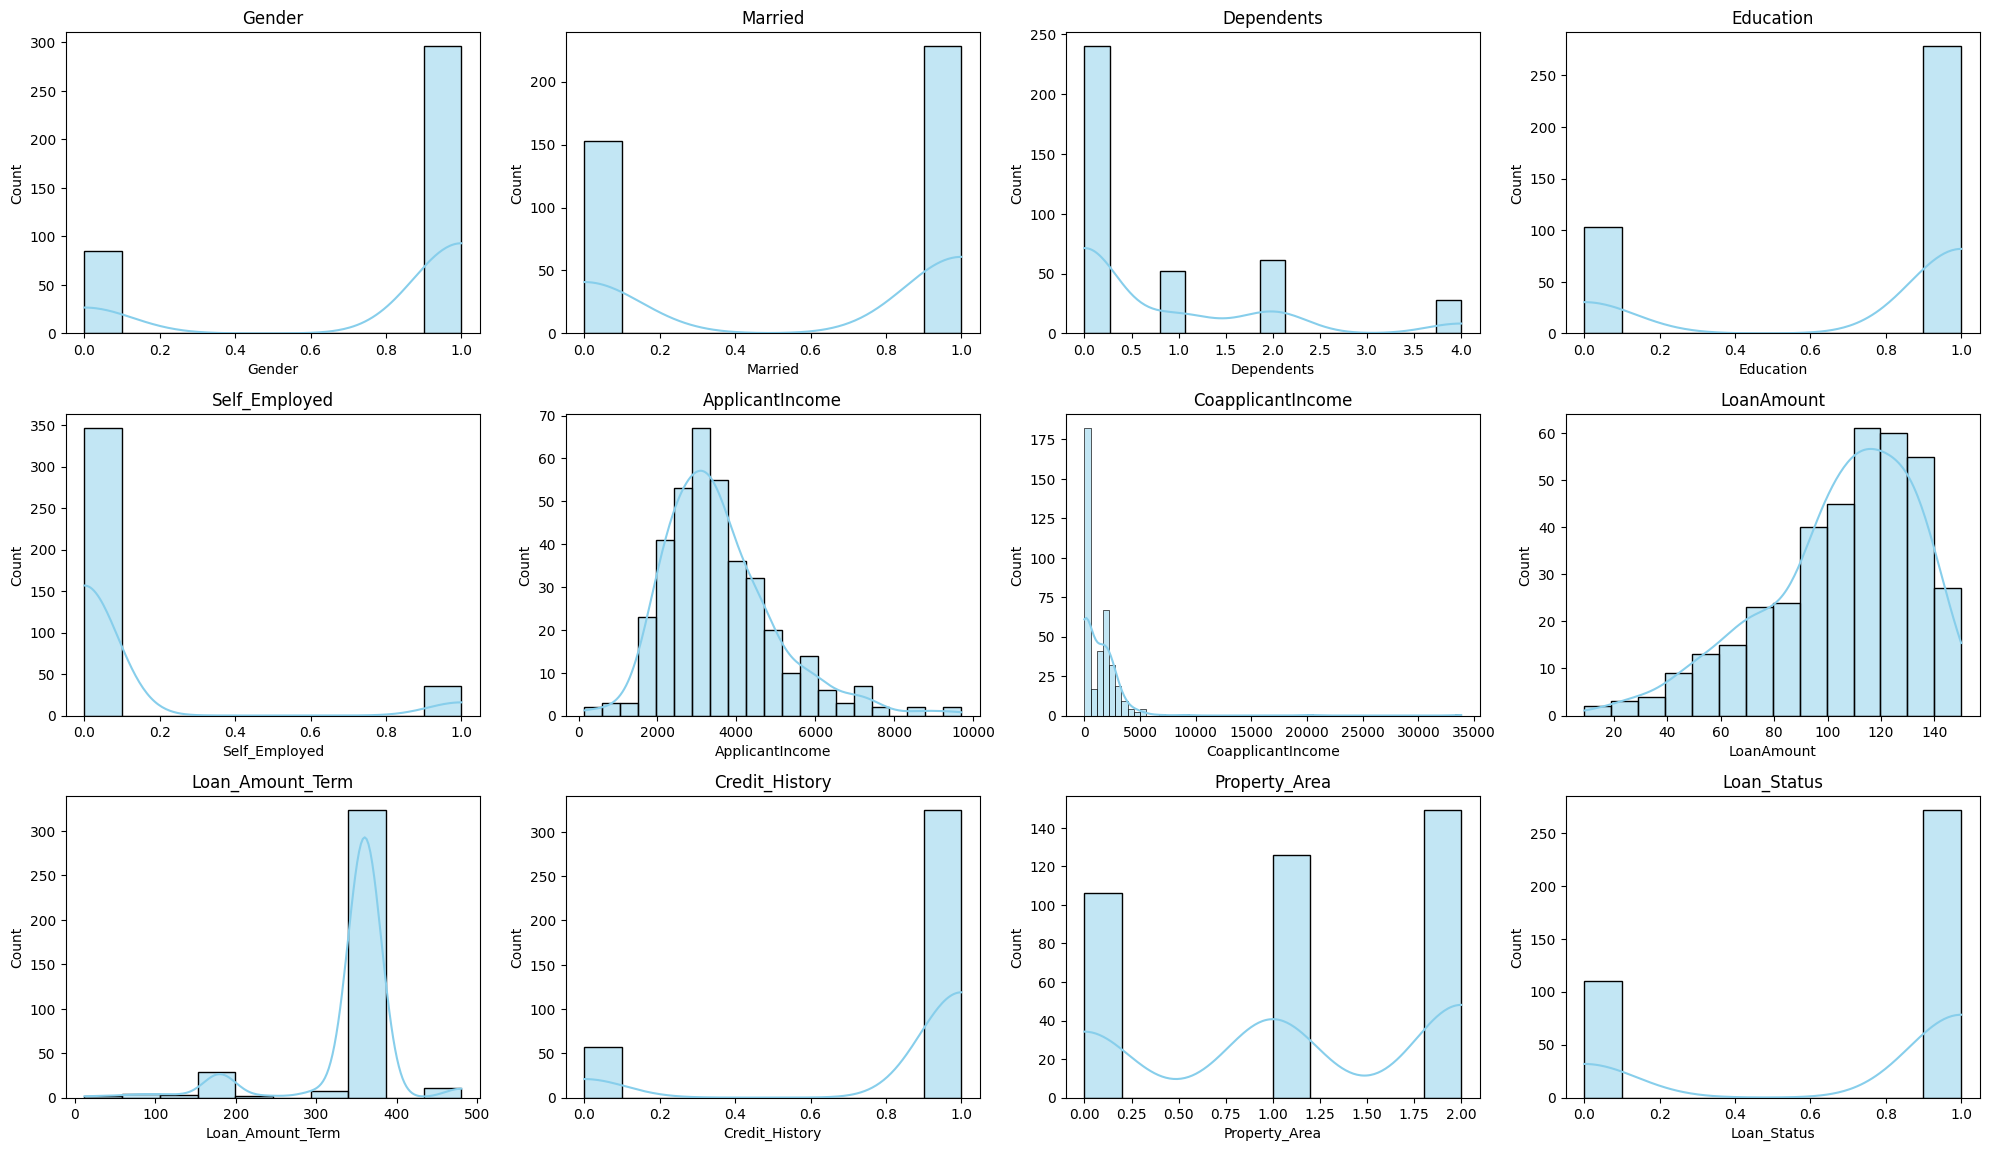

In [63]:
plt.figure(figsize=(20, 15))

# Loop through each column
for i, col in enumerate(df.columns, 1):
    plt.subplot((len(df.columns) // 4) + 1, 4, i)  # 4 columns per row
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], kde=True, color='skyblue')
    else:
        df[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [64]:
df.shape

(381, 12)

In [65]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1


In [67]:
nums = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

std_scaler = StandardScaler()
X[nums] = std_scaler.fit_transform(X[nums])

In [68]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,0.707469,0.098695,0.812575,0.275147,1.0,0
1,1,1,0,1,1,-0.408932,-0.546371,-1.376596,0.275147,1.0,1
2,1,1,0,0,0,-0.703019,0.462294,0.530102,0.275147,1.0,1
3,1,0,0,1,0,1.706799,-0.546371,1.271595,0.275147,1.0,1
4,1,1,0,0,0,-0.879330,0.102118,-0.352629,0.275147,1.0,1


In [71]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [76]:
def evaluate_model(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    avg_cross_val = cross_val_score(model, X, y, cv=5).mean()
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy: .2f}") 
    print(f"Average Cross-Validation Score: {avg_cross_val: .2f}\n")

In [77]:
model_scores = {model.__class__.__name__: evaluate_model(model) for model in models.values()}



Model: LogisticRegression
Accuracy:  0.82
Average Cross-Validation Score:  0.83

Model: SVC
Accuracy:  0.79
Average Cross-Validation Score:  0.84

Model: RandomForestClassifier
Accuracy:  0.82
Average Cross-Validation Score:  0.82

Model: DecisionTreeClassifier
Accuracy:  0.74
Average Cross-Validation Score:  0.79

Model: GradientBoostingClassifier
Accuracy:  0.79
Average Cross-Validation Score:  0.83



In [80]:
def tune_model(model, param_grid):
    tuner = RandomizedSearchCV(model, param_grid, cv = 5, n_iter =20, verbose = True, random_state = 42)
    tuner.fit(X, y)
    print(f"Best Score for {model.__class__.__name__}: {tuner.best_score_:.2f}")
    print(f"Best Parameter for {model.__class__.__name__}: {tuner.best_params_}")
    return tuner.best_estimator_

In [81]:
log_reg_grid = {'C': np.logspace(-4, 4, 20), "solver": ["liblinear"]}
svc_grid = {'C': [0.25, 0.50, 0.75, 1], "kernel": ['linear']}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': ['log2', 'sqrt'], 
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [82]:
best_log_reg = tune_model(LogisticRegression(), log_reg_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for LogisticRegression: 0.85
Best Parameter for LogisticRegression: {'solver': 'liblinear', 'C': np.float64(0.615848211066026)}


In [83]:
best_svc_reg = tune_model(svm.SVC(), svc_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score for SVC: 0.85
Best Parameter for SVC: {'kernel': 'linear', 'C': 0.25}


c:\Users\aravi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [84]:

best_rf = tune_model(RandomForestClassifier(), rf_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for RandomForestClassifier: 0.85
Best Parameter for RandomForestClassifier: {'n_estimators': np.int64(930), 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 30}


In [85]:
final_model = best_rf

In [86]:
joblib.dump(best_rf, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']

In [91]:
# Prediction System

sample_data = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [1000],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})

sample_data[nums] = std_scaler.transform(sample_data[nums])
loaded_model = joblib.load('loan_prediction_model.pkl')
prediction = loaded_model.predict(sample_data)

result = "Loan Approved" if prediction[0] == 1 else "Loan Not Approved"
print(f"\nPrediction Result: {result}")


Prediction Result: Loan Not Approved


In [90]:
joblib.dump(std_scaler, 'vector.pkl')

['vector.pkl']